In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
import numpy as np

In [2]:
df = pd.read_csv('Resources/cleaned_data.csv')
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,CHDRisk,MAP
0,1.0,39,4,0.0,0,0,0,0,0,195,26.97,80,77,0,82.000000
1,0.0,46,2,0.0,0,0,0,0,0,250,28.73,95,76,0,94.333333
2,1.0,48,1,1.0,20,0,0,0,0,245,25.34,75,70,0,95.833333
3,0.0,61,3,1.0,30,0,0,1,0,225,28.58,65,103,1,113.333333
4,0.0,46,3,1.0,23,0,0,0,0,285,23.10,85,85,0,99.333333


In [4]:
X = df.drop('CHDRisk', axis=1)
y = df['CHDRisk']

In [8]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(df.drop('CHDRisk', axis=1), df['CHDRisk'])

y = y_resampled
X = X_resampled

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [10]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [11]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [18]:
print(pca.explained_variance_ratio_)

[0.19476381 0.13081322 0.11310521 0.07807739 0.07438549 0.07248184
 0.06926847 0.06391293 0.0552501  0.04920333 0.04124007 0.02228054]


In [14]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Loadings (principal component coefficients)
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(n_components)])

# Explained variance
explained_variance = pd.DataFrame({'Explained Variance': explained_variance, 'Cumulative Variance': cumulative_variance})

# Print the loadings and explained variance
print("Loadings:")
print(loadings)
print("\nExplained Variance:")
print(explained_variance)

Loadings:
                      PC1       PC2       PC3       PC4       PC5       PC6  \
sex             -0.132364  0.351788 -0.037555 -0.421390 -0.424283  0.055428   
age              0.342866  0.010418 -0.068286 -0.202049 -0.056636  0.177942   
education       -0.104294 -0.045710  0.048488  0.540545 -0.578705  0.137349   
smokingStatus   -0.315344  0.533783 -0.059955  0.077407  0.091012  0.065464   
cigsPerDay      -0.287516  0.579235 -0.081937  0.022357  0.034260  0.029925   
BPMeds           0.260134  0.100379 -0.043579  0.217883 -0.143044  0.383111   
prevalentStroke  0.078611  0.018544 -0.057191 -0.137011  0.415231  0.711889   
prevalentHyp     0.423385  0.214897 -0.260582  0.030938 -0.084158  0.026307   
diabetes         0.213724  0.191530  0.640489 -0.054047 -0.002514 -0.006663   
totChol          0.202518  0.070901 -0.026335  0.359996 -0.089131  0.031275   
BMI              0.281329  0.094751 -0.143631 -0.279945 -0.046340 -0.433677   
heartRate        0.119501  0.232467 -0.035

* PC1: age (0.343), prevalentHyp (0.423), MAP (0.431): 
These variables have high positive loadings, suggesting that PC1 is influenced heavily by age, hypertension prevalence, and mean arterial pressure.
smokingStatus (-0.315), cigsPerDay (-0.288): These variables have high negative loadings, indicating an inverse relationship with PC1.
* PC2: smokingStatus (0.534), cigsPerDay (0.579): 
These variables have high positive loadings, indicating that PC2 is strongly associated with smoking behavior.
sex (0.352): This variable also contributes positively, though less strongly.
* PC3: diabetes (0.640), glucose (0.627): 
These variables have high positive loadings, suggesting PC3 is heavily influenced by diabetes and glucose levels.
MAP (-0.287), prevalentHyp (-0.261): 
These variables have high negative loadings, indicating an inverse relationship.
* PC4: education (0.541), heartRate (0.452): 
These variables have high positive loadings, suggesting PC4 is influenced by education level and heart rate.
sex (-0.421): 
This variable has a high negative loading, indicating an inverse relationship.
* PC5: education (-0.579), heartRate (0.502): 
These variables have high loadings, indicating that PC5 captures a contrast between education and heart rate.
sex (-0.424): This variable again has a high negative loading.

Based on the loadings and the explained variance, we can derive some interpretations:

* PC1 might represent a general health and age-related component, with high contributions from age, hypertension, and mean arterial pressure, and negative contributions from smoking status.
* PC2 could represent a smoking behavior component, heavily influenced by smoking status and the number of cigarettes per day.
* PC3 might be related to metabolic health, with strong contributions from diabetes and glucose levels.
* PC4 seems to capture aspects related to education and heart rate, with an inverse relationship to sex.
* PC5 could represent a contrast between education and heart rate.


Based on these loadings, you might consider dropping:

* sex
* BPMeds
* prevalentStroke
* heartRate

These features have relatively low contributions to the principal components that explain most of the variance.

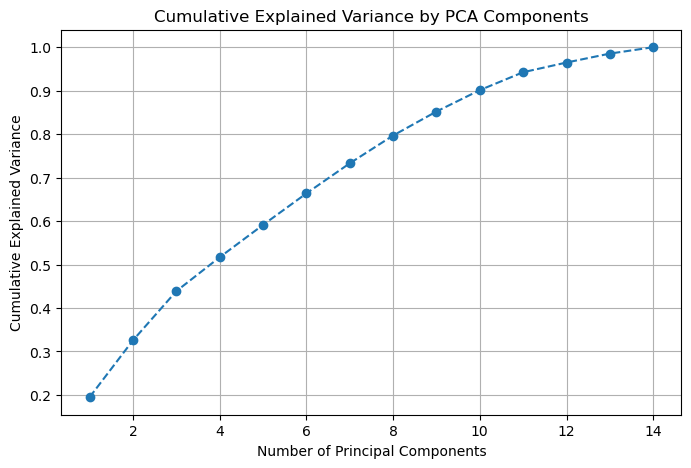

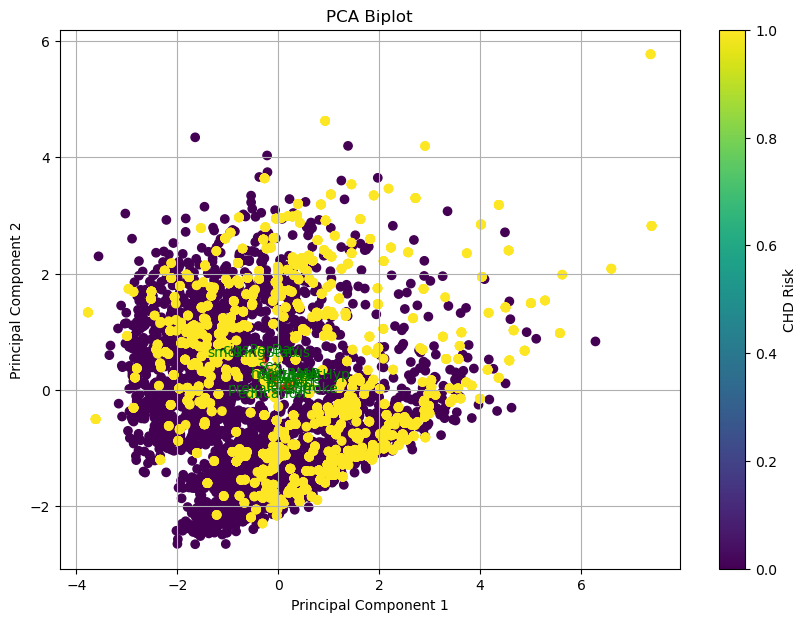

In [16]:
import matplotlib.pyplot as plt

# Plot the cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Biplot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.colorbar(label='CHD Risk')
plt.grid(True)

# Plot the loadings
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings.loc[var, 'PC1'], loadings.loc[var, 'PC2'], color='r', alpha=0.5)
    plt.text(loadings.loc[var, 'PC1']*1.2, loadings.loc[var, 'PC2']*1.2, var, color='g', ha='center', va='center')
    
plt.show()